In [2]:
import pandas as pd
import networkx as nx

# Load the edges dataset
edges = pd.read_csv('/content/musae_RU_edges.csv')

# Load the target dataset with page information
target_data = pd.read_csv('/content/musae_RU_target.csv')

# Display a few rows to check
print(edges.head())
print(target_data.head())


   from    to
0     0   646
1     0  2510
2     0  2425
3     0  2596
4     0    85
          id  days  mature  views  partner  new_id
0   43622128  1910   False   2002    False    1076
1   32314097  2273    True   1885    False    1090
2  112985248   998   False  14538    False     633
3   54595718  1738    True   8541    False    2238
4   72920173  1461   False  49854    False    1662


In [3]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges to the graph (assuming columns are 'source_id', 'target_id')
G.add_edges_from(edges[['from', 'to']].values)


In [4]:
import pandas as pd
import networkx as nx

# Load the edges dataset
edges = pd.read_csv('/content/musae_RU_edges.csv')

# Load the target dataset with page information
target_data = pd.read_csv('/content/musae_RU_target.csv')

# Initialize an undirected graph
G = nx.Graph()

# Add edges to the graph (assuming columns are 'source_id', 'target_id')
G.add_edges_from(edges[['from', 'to']].values)

# Add nodes from target_data to ensure all nodes exist in the graph
# This is the crucial step to prevent the KeyError
G.add_nodes_from(target_data['id'].unique())

# Add node attributes for each node in the graph using the target dataset
for index, row in target_data.iterrows():
    G.nodes[row['id']]['days'] = row['days']
    G.nodes[row['id']]['mature'] = row['mature']
    G.nodes[row['id']]['views'] = row['views']
    G.nodes[row['id']]['partner'] = row['partner']
    G.nodes[row['id']]['new_id'] = row['new_id']

# Example to check if the attributes are added
print(G.nodes(data=True))

[(0, {}), (646, {}), (2510, {}), (2425, {}), (2596, {}), (85, {}), (1725, {}), (208, {}), (1302, {}), (3534, {}), (57, {}), (3948, {}), (297, {}), (1800, {}), (2767, {}), (251, {}), (907, {}), (598, {}), (1786, {}), (1860, {}), (3294, {}), (1, {}), (3633, {}), (2535, {}), (6, {}), (1866, {}), (1276, {}), (2589, {}), (4082, {}), (571, {}), (2, {}), (3480, {}), (1165, {}), (648, {}), (1560, {}), (367, {}), (2879, {}), (344, {}), (1477, {}), (2567, {}), (2832, {}), (2777, {}), (2578, {}), (568, {}), (3665, {}), (1348, {}), (3348, {}), (3, {}), (3754, {}), (3600, {}), (231, {}), (3151, {}), (4263, {}), (1683, {}), (3961, {}), (3981, {}), (2312, {}), (2276, {}), (3192, {}), (1870, {}), (1628, {}), (1814, {}), (895, {}), (2289, {}), (1787, {}), (4313, {}), (4, {}), (1831, {}), (3339, {}), (1403, {}), (4302, {}), (1122, {}), (2116, {}), (1955, {}), (117, {}), (918, {}), (475, {}), (5, {}), (946, {}), (2001, {}), (2822, {}), (2563, {}), (3657, {}), (537, {}), (3100, {}), (3743, {}), (2826, {})

In [5]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Betweenness Centrality (approximate for large datasets, or you can skip)
# betweenness_centrality = nx.betweenness_centrality(G, k=1000)  # Approximate with k-sampling

# PageRank
pagerank_centrality = nx.pagerank(G)

# Eigenvector Centrality (you can skip for large datasets if too slow)
# eigenvector_centrality = nx.eigenvector_centrality(G)


In [6]:
# Create a DataFrame to store centrality measures along with node attributes
centrality_df = pd.DataFrame({
    'id': list(G.nodes),
    'degree_centrality': [degree_centrality[node] for node in G.nodes],
    'closeness_centrality': [closeness_centrality[node] for node in G.nodes],
    'pagerank_centrality': [pagerank_centrality[node] for node in G.nodes],
    # Uncomment if you computed these
    # 'betweenness_centrality': [betweenness_centrality[node] for node in G.nodes],
    # 'eigenvector_centrality': [eigenvector_centrality[node] for node in G.nodes]
})

# Merge centrality measures with target dataset to include node attributes
centrality_df = centrality_df.merge(target_data, on='id')

# Display top-ranked nodes by PageRank (or any other centrality measure)
print(centrality_df.sort_values(by='pagerank_centrality', ascending=False).head())


             id  degree_centrality  closeness_centrality  pagerank_centrality  \
0      43622128                0.0                   0.0              0.00003   
2921   35792445                0.0                   0.0              0.00003   
2927  116720921                0.0                   0.0              0.00003   
2926   96563408                0.0                   0.0              0.00003   
2925   92187196                0.0                   0.0              0.00003   

      days  mature    views  partner  new_id  
0     1910   False     2002    False    1076  
2921  2152   False    10342    False     850  
2927   962   False   217611    False     691  
2926  1181   False  1244059     True    2276  
2925  1232   False  1159648     True    1383  


In [7]:
# Rank influencers based on degree centrality (number of direct connections)
degree_centrality = nx.degree_centrality(G)

# Convert to DataFrame for analysis
degree_centrality_df = pd.DataFrame({
    'id': list(G.nodes),
    'degree_centrality': [degree_centrality[node] for node in G.nodes]
})

# Merge with target data to include node attributes
degree_centrality_df = degree_centrality_df.merge(target_data, on='id')

# Rank nodes by degree centrality (higher means more nodes affected)
ranked_influencers_by_degree = degree_centrality_df.sort_values(by='degree_centrality', ascending=False)

# Display top influencers by degree centrality
print(ranked_influencers_by_degree[['id', 'degree_centrality', 'views', 'partner']].head())


             id  degree_centrality    views  partner
0      43622128                0.0     2002    False
2921   35792445                0.0    10342    False
2927  116720921                0.0   217611    False
2926   96563408                0.0  1244059     True
2925   92187196                0.0  1159648     True


In [8]:
# Compute Katz centrality (captures direct and indirect influence)
# Increase the maximum number of iterations and adjust alpha if necessary
katz_centrality = nx.katz_centrality(G, alpha=0.01, beta=1.0, max_iter=5000)
# Lowered alpha and increased max_iter

# Convert to DataFrame for analysis
katz_centrality_df = pd.DataFrame({
    'id': list(G.nodes),
    'katz_centrality': [katz_centrality[node] for node in G.nodes]
})

# Merge with target data
katz_centrality_df = katz_centrality_df.merge(target_data, on='id')

# Rank nodes by Katz centrality
ranked_influencers_by_katz = katz_centrality_df.sort_values(by='katz_centrality', ascending=False)

# Display top influencers by Katz centrality
print(ranked_influencers_by_katz[['id', 'katz_centrality', 'views', 'partner']].head())

             id  katz_centrality    views  partner
0      43622128         0.005874     2002    False
2921   35792445         0.005874    10342    False
2927  116720921         0.005874   217611    False
2926   96563408         0.005874  1244059     True
2925   92187196         0.005874  1159648     True


In [9]:
# Compute PageRank
pagerank_centrality = nx.pagerank(G)

# Convert to DataFrame for analysis
pagerank_df = pd.DataFrame({
    'id': list(G.nodes),
    'pagerank_centrality': [pagerank_centrality[node] for node in G.nodes]
})

# Merge with target data
pagerank_df = pagerank_df.merge(target_data, on='id')

# Rank nodes by PageRank centrality
ranked_influencers_by_pagerank = pagerank_df.sort_values(by='pagerank_centrality', ascending=False)

# Display top influencers by PageRank centrality
print(ranked_influencers_by_pagerank[['id', 'pagerank_centrality', 'views', 'partner']].head())


             id  pagerank_centrality    views  partner
0      43622128              0.00003     2002    False
2921   35792445              0.00003    10342    False
2927  116720921              0.00003   217611    False
2926   96563408              0.00003  1244059     True
2925   92187196              0.00003  1159648     True


In [10]:
import random

def simulate_influence_spread(G, node, infection_prob=0.1, steps=10):
    # Initialize the infected set with the given node
    infected = {node}
    new_infected = {node}

    for _ in range(steps):
        next_infected = set()
        for inf_node in new_infected:
            neighbors = set(G.neighbors(inf_node))
            for neighbor in neighbors:
                if neighbor not in infected and random.random() < infection_prob:
                    next_infected.add(neighbor)
        if not next_infected:
            break
        infected.update(next_infected)
        new_infected = next_infected

    return len(infected)

# Simulate influence spread for each node
influence_spread = {node: simulate_influence_spread(G, node) for node in G.nodes}

# Convert results to a DataFrame
influence_spread_df = pd.DataFrame({
    'id': list(influence_spread.keys()),
    'affected_nodes': list(influence_spread.values())
})

# Merge with target data
influence_spread_df = influence_spread_df.merge(target_data, on='id')

# Rank nodes by the number of affected nodes
ranked_influencers_by_spread = influence_spread_df.sort_values(by='affected_nodes', ascending=False)

# Display top influencers by the number of nodes affected
print(ranked_influencers_by_spread[['id', 'affected_nodes', 'views', 'partner']].head())


             id  affected_nodes    views  partner
0      43622128               1     2002    False
2921   35792445               1    10342    False
2927  116720921               1   217611    False
2926   96563408               1  1244059     True
2925   92187196               1  1159648     True


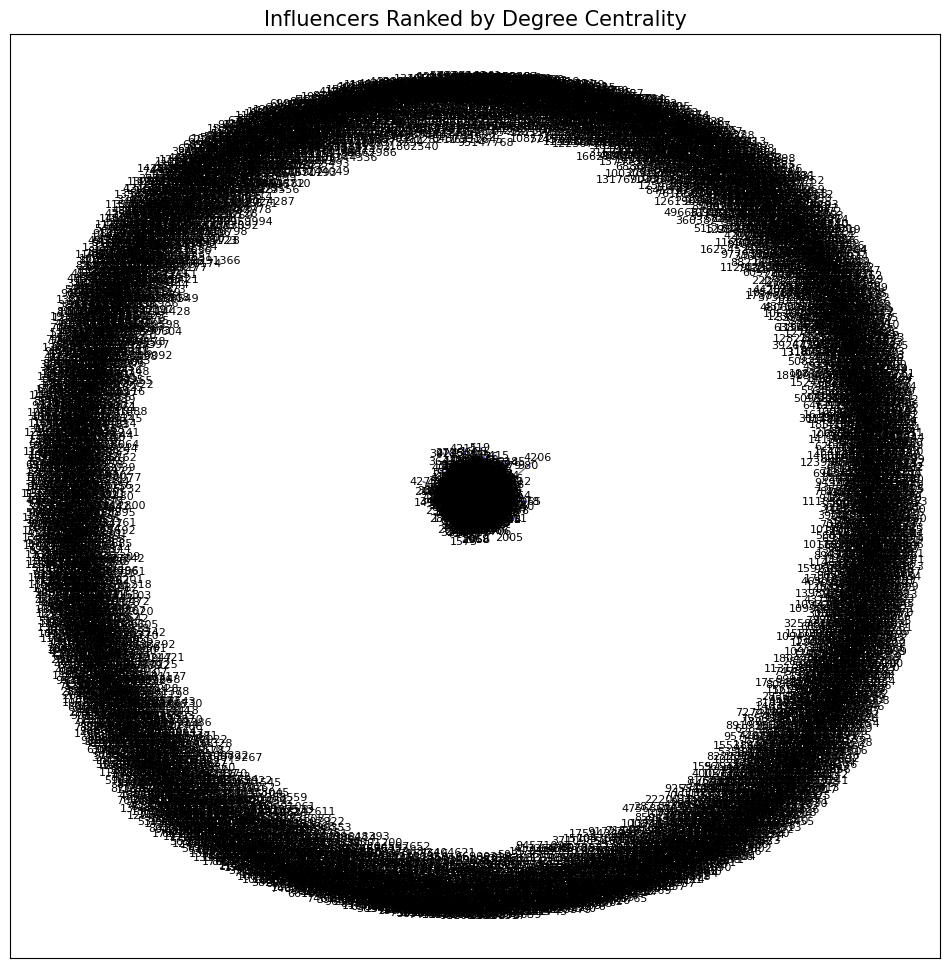

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Plot the graph with node sizes based on their degree centrality
plt.figure(figsize=(12, 12))

# Define node sizes based on centrality (scaled by 1000 for better visualization)
node_size = [v * 1000 for v in degree_centrality.values()]

# Draw the graph
pos = nx.spring_layout(G)  # Spring layout for visualization
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

# Title and show plot
plt.title('Influencers Ranked by Degree Centrality', size=15)
plt.show()


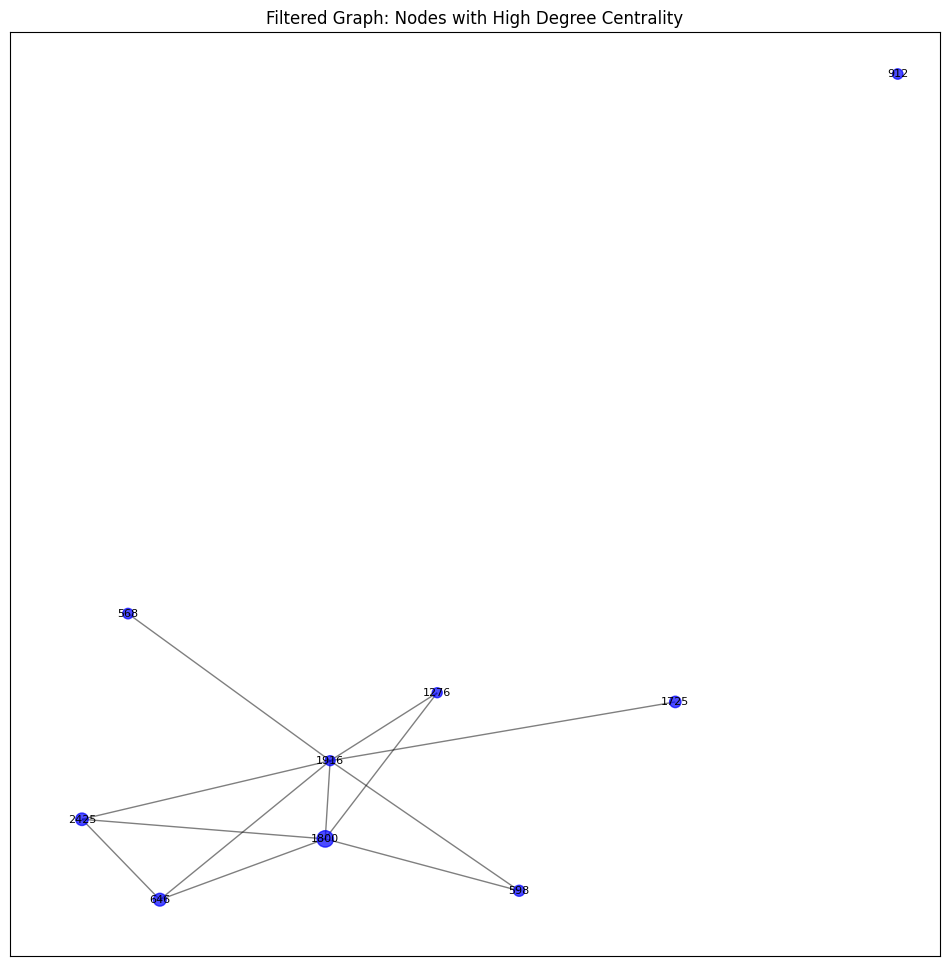

In [17]:
# Set a higher threshold to filter out even more nodes
degree_threshold = 0.05  # Adjust this value as needed
filtered_nodes = [node for node, centrality in degree_centrality.items() if centrality > degree_threshold]

# Create a subgraph with filtered nodes
filtered_G = G.subgraph(filtered_nodes)

# Plot the filtered graph
plt.figure(figsize=(12, 12))

# Node sizes based on degree centrality
filtered_node_size = [degree_centrality[node] * 1000 for node in filtered_G.nodes]

# Draw the filtered graph
pos = nx.spring_layout(filtered_G, k=0.5)  # Adjust k for better spacing
nx.draw_networkx_nodes(filtered_G, pos, node_size=filtered_node_size, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(filtered_G, pos, alpha=0.5)
nx.draw_networkx_labels(filtered_G, pos, font_size=8)

plt.title('Filtered Graph: Nodes with High Degree Centrality')
plt.show()



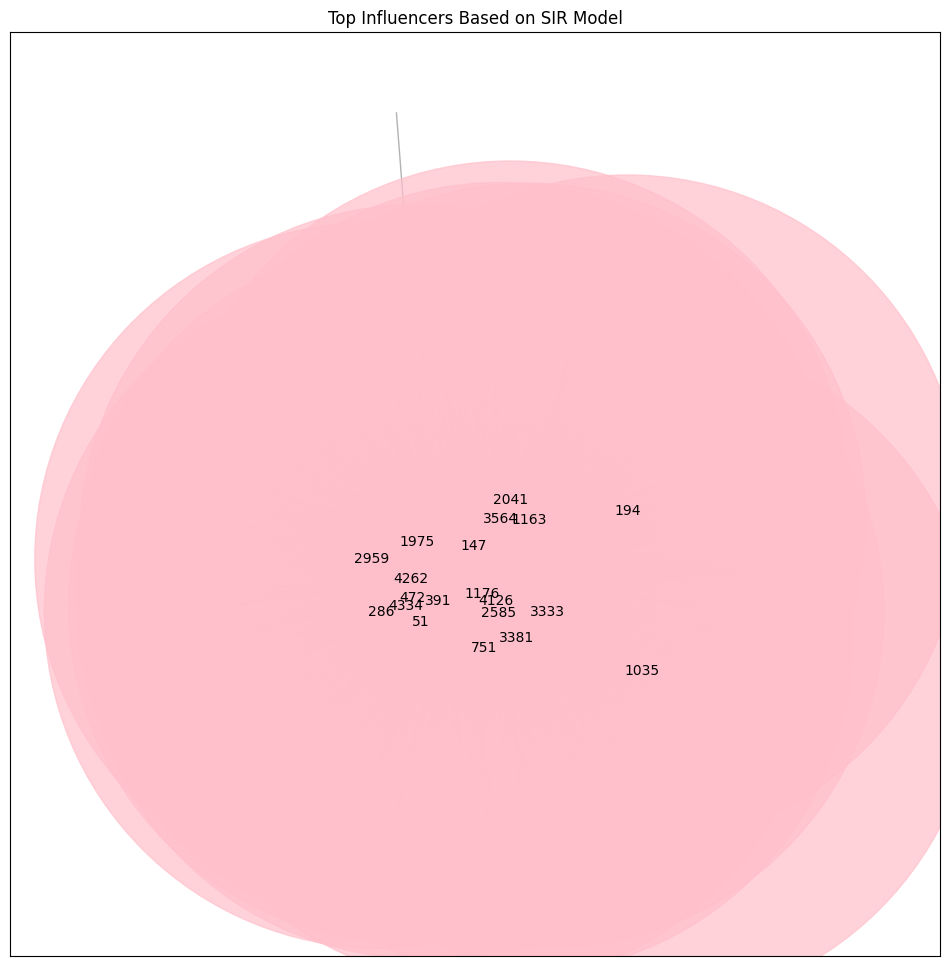

In [22]:
# Get top N nodes based on the number of affected nodes during SIR simulation
top_influencers_sir = sorted(influence_spread.items(), key=lambda x: x[1], reverse=True)[:20]  # Top 20 nodes

top_influencer_nodes = [x[0] for x in top_influencers_sir]

# Plot only the top influencers based on SIR
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

# Node sizes based on the number of nodes they affected
node_size = [influence_spread[node] * 100 for node in top_influencer_nodes]

# Draw filtered graph
nx.draw_networkx_nodes(G, pos, nodelist=top_influencer_nodes, node_size=node_size, node_color='pink', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Draw labels for top influencers
nx.draw_networkx_labels(G, pos, labels={node: node for node in top_influencer_nodes}, font_size=10)

plt.title('Top Influencers Based on SIR Model')
plt.show()



In [13]:
data = pd.read_csv('/content/musae_RU_edges.csv')
#data1 = np.genfromtxt(fname='Network for IC LT.txt')
#pd.read_txt('sample_data/Data/')
#data2=pd.read_txt('sample_data/Data/Network for IC-u LT-u.txt')
# Read the edgelist of the NetScience network
G = nx.from_pandas_edgelist(data, data.columns[0], data.columns[1])
print("Edges", G.number_of_edges())
print("Nodes", G.number_of_nodes())
print("len", len(max(nx.connected_components(G), key=len)))
G.nodes(data=True)

#To attribute features to nodes
target = pd.read_csv('/content/musae_RU_target.csv')
#target = target.drop(columns = ['id'])
target = target.set_index('id')
nx.set_node_attributes(G, target.to_dict('index'))
G.nodes(data=True)

Edges 37304
Nodes 4385
len 4385


NodeDataView({0: {}, 646: {}, 2510: {}, 2425: {}, 2596: {}, 85: {}, 1725: {}, 208: {}, 1302: {}, 3534: {}, 57: {}, 3948: {}, 297: {}, 1800: {}, 2767: {}, 251: {}, 907: {}, 598: {}, 1786: {}, 1860: {}, 3294: {}, 1: {}, 3633: {}, 2535: {}, 6: {}, 1866: {}, 1276: {}, 2589: {}, 4082: {}, 571: {}, 2: {}, 3480: {}, 1165: {}, 648: {}, 1560: {}, 367: {}, 2879: {}, 344: {}, 1477: {}, 2567: {}, 2832: {}, 2777: {}, 2578: {}, 568: {}, 3665: {}, 1348: {}, 3348: {}, 3: {}, 3754: {}, 3600: {}, 231: {}, 3151: {}, 4263: {}, 1683: {}, 3961: {}, 3981: {}, 2312: {}, 2276: {}, 3192: {}, 1870: {}, 1628: {}, 1814: {}, 895: {}, 2289: {}, 1787: {}, 4313: {}, 4: {}, 1831: {}, 3339: {}, 1403: {}, 4302: {}, 1122: {}, 2116: {}, 1955: {}, 117: {}, 918: {}, 475: {}, 5: {}, 946: {}, 2001: {}, 2822: {}, 2563: {}, 3657: {}, 537: {}, 3100: {}, 3743: {}, 2826: {}, 1612: {}, 3112: {}, 2965: {}, 3364: {}, 2315: {}, 1093: {}, 146: {}, 956: {}, 3108: {}, 653: {}, 1755: {}, 1506: {}, 701: {}, 3983: {}, 640: {}, 2201: {}, 1159